BEADANDÓ FELADAT

### Minimum/maximum/átlag/értékek eloszlása

In [ ]:
SELECT ROUND(MIN(LISTAAR), 2) AS 'Minimum', 
       ROUND(MAX(LISTAAR), 2) AS 'Maximum', 
       ROUND(AVG(LISTAAR), 2) AS 'Átlag', 
       ROUND(STDEV(LISTAAR), 2) AS 'Eloszlás'
FROM Termek
WHERE LISTAAR IS NOT NULL

In [ ]:
SELECT ROUND(MIN(KESZLET), 2) AS 'Minimum', 
       ROUND(MAX(KESZLET), 2) AS 'Maximum', 
       ROUND(AVG(KESZLET), 2) AS 'Átlag', 
       ROUND(STDEV(KESZLET), 2) AS 'Eloszlás'
FROM Termek
WHERE KESZLET IS NOT NULL

In [ ]:
SELECT ROUND(MIN(KAT_ID), 2) AS 'Minimum', 
       ROUND(MAX(KAT_ID), 2) AS 'Maximum', 
       ROUND(AVG(KAT_ID), 2) AS 'Átlag', 
       ROUND(STDEV(KAT_ID), 2) AS 'Eloszlás'
FROM Termek
WHERE KAT_ID IS NOT NULL

### Minimum/maximum szöveg esetén

In [ ]:
SELECT MIN(LEIRAS) AS 'Szöveg Maximum', 
       MAX(LEIRAS) AS 'Szöveg Minimum'
FROM Termek
WHERE LEIRAS IS NOT NULL
AND LEN(LEIRAS) > 0

In [ ]:
SELECT MIN(MEGNEVEZES) AS 'Szöveg Maximum', 
       MAX(MEGNEVEZES) AS 'Szöveg Minimum'
FROM Termek
WHERE MEGNEVEZES IS NOT NULL
AND LEN(MEGNEVEZES) > 0

In [ ]:
SELECT MIN(FELVITTE) AS 'Szöveg Maximum', 
       MAX(FELVITTE) AS 'Szöveg Minimum'
FROM Termek
WHERE FELVITTE IS NOT NULL
AND LEN(FELVITTE) > 0

### Minimum/maximum/átlag szöveg hossza esetén

In [ ]:
SELECT MIN(LEN(LEIRAS)) AS 'Minimum szöveghossz', 
       MAX(LEN(LEIRAS)) AS 'Maximum szöveghossz', 
       AVG(LEN(LEIRAS)) AS 'Átlag szöveghossz'
FROM Termek
WHERE LEIRAS IS NOT NULL
AND LEN(LEIRAS) > 0

In [ ]:
SELECT MIN(LEN(MEGNEVEZES)) AS 'Minimum szöveghossz', 
       MAX(LEN(MEGNEVEZES)) AS 'Maximum szöveghossz', 
       AVG(LEN(MEGNEVEZES)) AS 'Átlag szöveghossz'
FROM Termek
WHERE MEGNEVEZES IS NOT NULL
AND LEN(MEGNEVEZES) > 0

In [ ]:
SELECT MIN(LEN(FELVITTE)) AS 'Minimum szöveghossz', 
       MAX(LEN(FELVITTE)) AS 'Maximum szöveghossz', 
       AVG(LEN(FELVITTE)) AS 'Átlag szöveghossz'
FROM Termek
WHERE FELVITTE IS NOT NULL
AND LEN(FELVITTE) > 0

### Null értékek számok és dátumok esetén

In [ ]:
SELECT sortipus AS 'Sor típusa',
    COUNT(*) AS 'Sorok száma',
    CAST(COUNT(*) * 100.0 / SUM(COUNT(*)) OVER () AS DECIMAL(10,2)) AS 'Százalék (%)'
FROM 
    (SELECT 
        CASE WHEN KESZLET IS NULL THEN 'Null'
            ELSE 'Nem üres' 
            END AS sortipus
        FROM Termek) rows
GROUP BY sortipus

In [ ]:
SELECT sortipus AS 'Sor típusa',
    COUNT(*) AS 'Sorok száma',
    CAST(COUNT(*) * 100.0 / SUM(COUNT(*)) OVER () AS DECIMAL(10,2)) AS 'Százalék (%)'
FROM 
    (SELECT 
        CASE WHEN FELVITEL IS NULL THEN 'Null'
            ELSE 'Nem üres' 
            END AS sortipus
        FROM Termek) rows
GROUP BY sortipus

In [ ]:
SELECT sortipus AS 'Sor típusa',
    COUNT(*) AS 'Sorok száma',
    CAST(COUNT(*) * 100.0 / SUM(COUNT(*)) OVER () AS DECIMAL(10,2)) AS 'Százalék (%)'
FROM 
    (SELECT 
        CASE WHEN LISTAAR IS NULL THEN 'Null'
            ELSE 'Nem üres' 
            END AS sortipus
        FROM Termek) rows
GROUP BY sortipus

### Null és üres értékek szöveg esetén

In [ ]:
SELECT sortipus AS 'Sor típusa',
    COUNT(*) AS 'Sorok száma',
    CAST(COUNT(*) * 100.0 / SUM(COUNT(*)) OVER () AS DECIMAL(10,2)) AS 'Százalék (%)'
FROM 
    (SELECT 
        CASE WHEN LEIRAS IS NULL THEN 'Null'
            WHEN LEN(LEIRAS) = 0 THEN 'Üres'
            ELSE 'Nem üres' 
            END AS sortipus
        FROM Termek) rows
GROUP BY sortipus

NULL sorok százalékos eloszlása

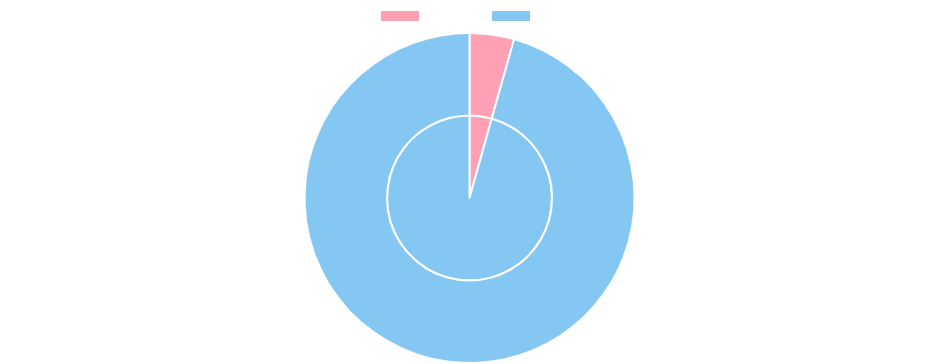

In [ ]:
SELECT sortipus AS 'Sor típusa',
    COUNT(*) AS 'Sorok száma',
    CAST(COUNT(*) * 100.0 / SUM(COUNT(*)) OVER () AS DECIMAL(10,2)) AS 'Százalék (%)'
FROM 
    (SELECT 
        CASE WHEN MEGNEVEZES IS NULL THEN 'Null'
            WHEN LEN(MEGNEVEZES) = 0 THEN 'Üres'
            ELSE 'Nem üres' 
            END AS sortipus
        FROM Termek) rows
GROUP BY sortipus

In [ ]:
SELECT sortipus AS 'Sor típusa',
    COUNT(*) AS 'Sorok száma',
    CAST(COUNT(*) * 100.0 / SUM(COUNT(*)) OVER () AS DECIMAL(10,2)) AS 'Százalék (%)'
FROM 
    (SELECT 
        CASE WHEN FELVITTE IS NULL THEN 'Null'
            WHEN LEN(FELVITTE) = 0 THEN 'Üres'
            ELSE 'Nem üres' 
            END AS sortipus
        FROM Termek) rows
GROUP BY sortipus

Kiugró érték keresése

In [ ]:
SELECT KAT_ID AS 'Érték', COUNT(*) AS 'Előfordulás száma'
FROM Termek
GROUP BY KAT_ID
HAVING COUNT(*) = 1;

In [ ]:
SELECT LEIRAS AS 'Érték', COUNT(*) AS 'Előfordulás száma'
FROM Termek
GROUP BY LEIRAS
HAVING COUNT(*) = 1;

In [ ]:
SELECT MEGYS AS 'Érték', COUNT(*) AS 'Előfordulás száma'
FROM Termek
GROUP BY MEGYS
HAVING COUNT(*) = 1;

Eloszlás szöveges értékek esetén

In [ ]:
SELECT LEN(LEIRAS) AS 'Szöveghossz',
       count(*) AS 'Sorok száma'
FROM Termek
WHERE LEIRAS IS NOT NULL
GROUP BY LEN(LEIRAS)
ORDER BY 1

Szövegek hosszának eloszlása ábrázolva

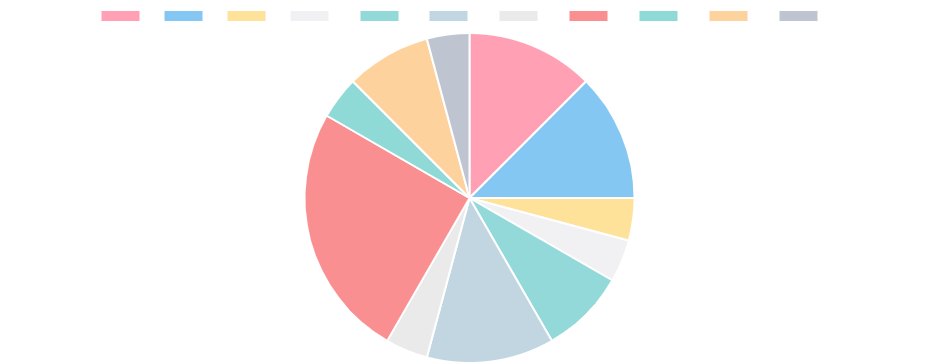

In [ ]:
SELECT LEN(MEGNEVEZES) AS 'Szöveghossz',
       count(*) AS 'Sorok száma'
FROM Termek
WHERE MEGNEVEZES IS NOT NULL
GROUP BY LEN(MEGNEVEZES)
ORDER BY 1

Szövegek hosszának eloszlása ábrázolva

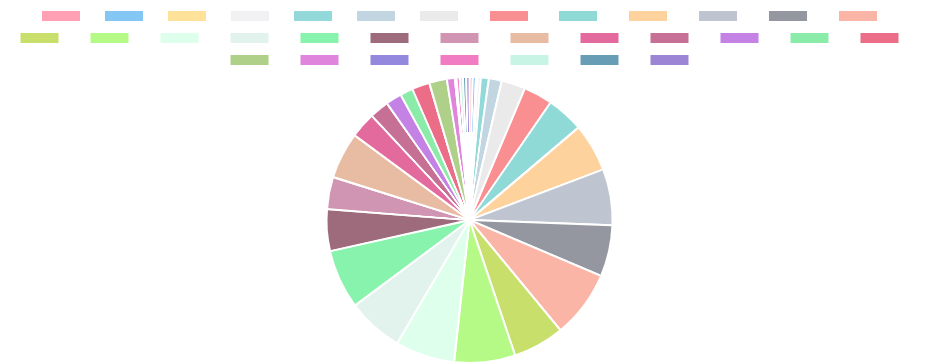

In [ ]:
SELECT LEN(TERMEKKOD) AS 'Szöveghossz',
       COUNT(*) AS 'Sorok száma'
FROM Termek
WHERE TERMEKKOD IS NOT NULL
GROUP BY LEN(TERMEKKOD)
ORDER BY 1